In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import requests

In [2]:
#sets the base URL to for the weather map API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
#creates a set of random ;latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)

#zips both functions having the same index in their respective array into a tuple
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#adds the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
#creates a list for holding the cities
cities = []

#identify the nearest city for each coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city is unique then will be added to the cities list
    if city not in cities:
        cities.append(city)
len(cities)

656

In [6]:
#creates an empty list to hold the weather data
city_data =[]

#print the beginning of the logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

#creates counters
record_count = 1
set_count = 1

#loops through all the cities in our list
for i, city in enumerate(cities):
    
    #groups cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #creates the endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    #logs the URl, records and set numbers and the city
    print(f'Processing Record {record_count} of set {set_count} | {city}')
    
    #adds 1 to the record count
    record_count += 1
        #Run an API request for each of the cities
    try:
        #parses the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        
        #parses the data that we need
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        #converts the date into ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        #appends the city information into the city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
    
    #if an error is experienced. skip the city
    except:
        print('City not found. Skipping...')
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | ushuaia
Processing Record 2 of set 1 | pijijiapan
Processing Record 3 of set 1 | turochak
Processing Record 4 of set 1 | punta arenas
Processing Record 5 of set 1 | cherskiy
Processing Record 6 of set 1 | xichang
Processing Record 7 of set 1 | grand island
Processing Record 8 of set 1 | baijiantan
Processing Record 9 of set 1 | seymchan
Processing Record 10 of set 1 | tuktoyaktuk
Processing Record 11 of set 1 | nikolskoye
Processing Record 12 of set 1 | khatanga
Processing Record 13 of set 1 | chuy
Processing Record 14 of set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of set 1 | utiroa
City not found. Skipping...
Processing Record 16 of set 1 | new norfolk
Processing Record 17 of set 1 | mataura
Processing Record 18 of set 1 | pacific grove
Processing Record 19 of set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of set 1 | bundi
Processing Record 2

Processing Record 42 of set 4 | kaitangata
Processing Record 43 of set 4 | vuktyl
Processing Record 44 of set 4 | longyearbyen
Processing Record 45 of set 4 | stephenville crossing
Processing Record 46 of set 4 | tessalit
Processing Record 47 of set 4 | svetlaya
Processing Record 48 of set 4 | anloga
Processing Record 49 of set 4 | esperance
Processing Record 50 of set 4 | atbasar
Processing Record 1 of set 5 | maxixe
Processing Record 2 of set 5 | basco
Processing Record 3 of set 5 | kruisfontein
Processing Record 4 of set 5 | camabatela
Processing Record 5 of set 5 | saint-pierre
Processing Record 6 of set 5 | noyabrsk
Processing Record 7 of set 5 | pansoy
Processing Record 8 of set 5 | half moon bay
Processing Record 9 of set 5 | namibe
Processing Record 10 of set 5 | alihe
Processing Record 11 of set 5 | lavrentiya
Processing Record 12 of set 5 | ketchikan
Processing Record 13 of set 5 | lorengau
Processing Record 14 of set 5 | remuna
Processing Record 15 of set 5 | bourne
Processi

Processing Record 39 of set 8 | eregli
Processing Record 40 of set 8 | takoradi
Processing Record 41 of set 8 | airai
Processing Record 42 of set 8 | terrace bay
Processing Record 43 of set 8 | galgani
City not found. Skipping...
Processing Record 44 of set 8 | igarape-miri
City not found. Skipping...
Processing Record 45 of set 8 | isla vista
Processing Record 46 of set 8 | sambava
Processing Record 47 of set 8 | dingle
Processing Record 48 of set 8 | puerto del rosario
Processing Record 49 of set 8 | areia branca
Processing Record 50 of set 8 | saskylakh
Processing Record 1 of set 9 | newport
Processing Record 2 of set 9 | chunoyar
Processing Record 3 of set 9 | pingliang
Processing Record 4 of set 9 | port macquarie
Processing Record 5 of set 9 | poronaysk
Processing Record 6 of set 9 | fare
Processing Record 7 of set 9 | saleaula
City not found. Skipping...
Processing Record 8 of set 9 | ugoofaaru
Processing Record 9 of set 9 | ostrovnoy
Processing Record 10 of set 9 | grand river 

Processing Record 22 of set 12 | inderborskiy
City not found. Skipping...
Processing Record 23 of set 12 | linjiang
Processing Record 24 of set 12 | tual
Processing Record 25 of set 12 | mandera
Processing Record 26 of set 12 | mitsamiouli
Processing Record 27 of set 12 | arica
Processing Record 28 of set 12 | tumut
Processing Record 29 of set 12 | inirida
Processing Record 30 of set 12 | bereda
Processing Record 31 of set 12 | cabra
Processing Record 32 of set 12 | berlevag
Processing Record 33 of set 12 | croix
Processing Record 34 of set 12 | dekoa
City not found. Skipping...
Processing Record 35 of set 12 | kailasahar
City not found. Skipping...
Processing Record 36 of set 12 | biak
Processing Record 37 of set 12 | de aar
Processing Record 38 of set 12 | durango
Processing Record 39 of set 12 | ubata
Processing Record 40 of set 12 | santa cruz de tenerife
Processing Record 41 of set 12 | codrington
Processing Record 42 of set 12 | jalu
Processing Record 43 of set 12 | beyneu
Proces

In [7]:
#convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)

#new column order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-02-03 20:03:21,-54.8000,-68.3000,55.40,58,20,17.27
1,Pijijiapan,MX,2021-02-03 20:00:16,15.7011,-93.2300,91.47,29,0,9.80
2,Turochak,RU,2021-02-03 20:03:34,52.2576,87.1224,32.27,97,100,8.46
3,Punta Arenas,CL,2021-02-03 20:03:14,-53.1500,-70.9167,64.40,59,75,14.97
4,Cherskiy,RU,2021-02-03 20:03:34,68.7500,161.3000,9.79,86,100,7.38
5,Xichang,CN,2021-02-03 20:03:34,27.8964,102.2634,42.03,65,1,1.34
6,Grand Island,US,2021-02-03 20:03:34,40.9250,-98.3420,43.00,70,1,12.66
7,Baijiantan,CN,2021-02-03 20:03:34,45.6333,85.1833,12.94,90,27,4.45
8,Seymchan,RU,2021-02-03 20:03:34,62.8833,152.4333,-19.62,86,100,11.70
9,Tuktoyaktuk,CA,2021-02-03 20:03:35,69.4541,-133.0374,-41.80,66,75,4.61


In [9]:
#creates the output file (CSV)
output_data_file = 'weather_data/cities.csv'

#exports city_data_df into a csv
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [10]:
#extracts the relevant fields from city_data_df for plotting
lats = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


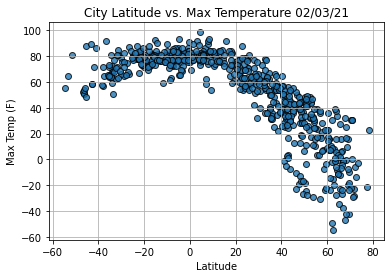

In [15]:
#imports time module
import time

#builds the scatter plot for Latitude vs. Max Temp
plt.scatter(lats,
           max_temp,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

#saves the figure
plt.savefig('weather_data/Fig1.png')

#shows plot
plt.show()

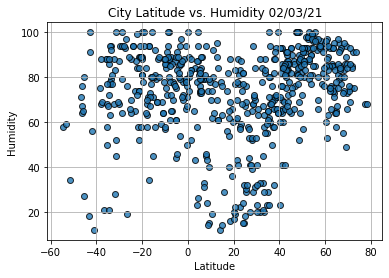

In [17]:
#builds the scatter plot for Latitude vs.Humidity
plt.scatter(lats,
           humidity,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

#saves the figure
plt.savefig('weather_data/Fig2.png')

#shows plot
plt.show()

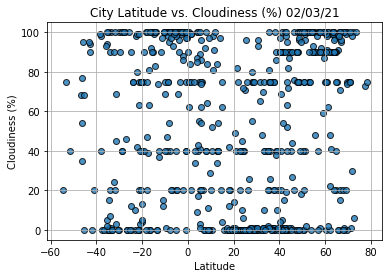

In [18]:
#builds the scatter plot for Latitude vs. Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#saves the figure
plt.savefig('weather_data/Fig3.png')

#shows plot
plt.show()

In [ ]:
#builds the scatter plot for Latitude vs. Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (mph) ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#saves the figure
plt.savefig('weather_data/Fig4.png')

#shows plot
plt.show()